# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

In [2]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_4_new")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2=  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()] # folder1 - RP_curves_fr7m
print ("2",input_dir2)

input G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new
2 [WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_4_new/RP_curves_fr13m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_4_new/RP_curves_fr15m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_4_new/RP_curves_fr17m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_4_new/RP_curves_fr19m')]


In [3]:
#dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list = []

for folder1 in input_dir2:
    
    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()] # folder2 - 07m00.5kg
    
    for folder2 in input_dir3:
        
        print ('folder', folder2)
        files1 = [file1 for file1 in folder2.rglob("*.xlsx")]
    
        for file1 in files1:
            df_list.append(pd.read_excel(file1))
            print (file1.stem)
    
dataset = pd.concat(df_list, ignore_index = True)

folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m00.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m02.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m04.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m06.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m08.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m10.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m12.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m14.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_4_new\RP_curves_fr13m\13m16.5kg
1.xlsx
2.xlsx
3.xlsx
4.xlsx
f

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45639 entries, 0 to 45638
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               45639 non-null  float64
 1   Standoff distance  45639 non-null  int64  
 2   Angle              45639 non-null  int64  
 3   Time               45639 non-null  float64
 4   Phase              45639 non-null  object 
 5   Pressure           45639 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.1+ MB


In [5]:
# Assuming your original column is named 'Category'
dataset['Phase'] = dataset['Phase'].replace({'negative_increasing': 'negative', 'negative_decreasing': 'negative'})
dataset = pd.get_dummies(dataset, columns =['Phase'], dtype = np.uint8)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45639 entries, 0 to 45638
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               45639 non-null  float64
 1   Standoff distance  45639 non-null  int64  
 2   Angle              45639 non-null  int64  
 3   Time               45639 non-null  float64
 4   Pressure           45639 non-null  float64
 5   Phase_negative     45639 non-null  uint8  
 6   Phase_positive     45639 non-null  uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 1.8 MB


In [6]:
dataset.head(30)

,Mass,Standoff distance,Angle,Time,Pressure,Phase_negative,Phase_positive
0,0.5,13,0,32.475292,10.613961,0,1
1,0.5,13,0,32.501128,10.575125,0,1
2,0.5,13,0,32.526964,10.331852,0,1
3,0.5,13,0,32.578656,9.636125,0,1
4,0.5,13,0,32.604503,9.363102,0,1
5,0.5,13,0,32.630350,9.191898,0,1
6,0.5,13,0,32.656197,9.095148,0,1
7,0.5,13,0,32.682045,9.017906,0,1
8,0.5,13,0,32.707893,8.859992,0,1
9,0.5,13,0,32.733743,8.544781,0,1


In [7]:
y = dataset['Pressure']
X = dataset.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(45639, 6) (45639,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_train[:,0:4] = sc.transform(X_train[:, 0:4])
print (X_train)

[[ 1.3876351   0.4768852  -1.52779325 -0.25515395  0.          1.        ]
 [ 0.94852049  0.4768852  -0.59410962 -0.06869631  1.          0.        ]
 [ 1.3876351  -0.43419744 -0.59410962  0.47509428  1.          0.        ]
 ...
 [ 0.75335844  1.38796784  1.27325765  2.08624138  0.          1.        ]
 [ 1.14368254  1.38796784 -1.52779325  0.18820595  0.          1.        ]
 [-1.00310001 -1.34528007  1.27325765  0.48164852  1.          0.        ]]


In [13]:
X_test[:,0:4] = sc.transform(X_test[:,0:4])
print (X_test)

[[ 0.55819639 -0.43419744 -0.59410962 -1.24662062  0.          1.        ]
 [-0.41761386 -1.34528007  0.33957402 -1.25130844  0.          1.        ]
 [ 0.55819639  1.38796784 -1.52779325  0.16633118  0.          1.        ]
 ...
 [ 0.75335844 -0.43419744  1.27325765  0.16585957  0.          1.        ]
 [ 0.75335844  1.38796784  0.33957402  0.07725022  0.          1.        ]
 [ 0.55819639  1.38796784  1.27325765  2.23079913  0.          1.        ]]


In [14]:
X_val[:,0:4] = sc.transform(X_val[:,0:4])
print (X_val)

[[-0.41761386 -0.43419744 -0.59410962 -0.50674892  0.          1.        ]
 [ 0.75335844  1.38796784  1.27325765  1.98485153  0.          1.        ]
 [-0.02728976  1.38796784 -0.59410962  0.56128337  1.          0.        ]
 ...
 [ 0.94852049  1.38796784  1.27325765  1.15517198  0.          1.        ]
 [-0.41761386  0.4768852  -0.59410962 -0.50947419  0.          1.        ]
 [-0.61277591  1.38796784  0.33957402  1.07991116  0.          1.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 27383
X_test 9128
X_val 9128


## Part 3 - Building the ANN

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
ann.add(tf.keras.layers.Dense(units=250,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=225,
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=200,
                              activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               1750      
                                                                 
 dense_1 (Dense)             (None, 225)               56475     
                                                                 
 dense_2 (Dense)             (None, 200)               45200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 103,626
Trainable params: 103,626
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [19]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [20]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [21]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
913/913 [==============================] - 38s 41ms/step - loss: 37.2081 - mae: 2.9539 - val_loss: 26.6059 - val_mae: 2.3588
Epoch 2/500
913/913 [==============================] - 4s 5ms/step - loss: 18.6172 - mae: 1.9855 - val_loss: 14.2925 - val_mae: 1.5590
Epoch 3/500
913/913 [==============================] - 4s 5ms/step - loss: 14.6317 - mae: 1.6998 - val_loss: 12.5000 - val_mae: 1.5997
Epoch 4/500
913/913 [==============================] - 4s 5ms/step - loss: 13.1829 - mae: 1.5785 - val_loss: 12.3514 - val_mae: 1.4304
Epoch 5/500
913/913 [==============================] - 4s 5ms/step - loss: 9.8199 - mae: 1.3449 - val_loss: 12.2322 - val_mae: 1.5324
Epoch 6/500
913/913 [==============================] - 4s 5ms/step - loss: 11.0175 - mae: 1.4207 - val_loss: 11.8345 - val_mae: 1.4275
Epoch 7/500
913/913 [==============================] - 4s 5ms/step - loss: 8.3681 - mae: 1.2373 - val_loss: 7.1910 - val_mae: 1.0718
Epoch 8/500
913/913 [==============================] - 4

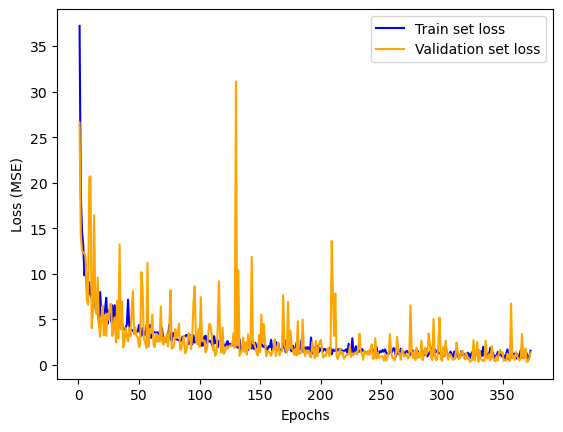

In [22]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section4_ANN7_2.png', dpi=300, bbox_inches='tight')
plt.show()

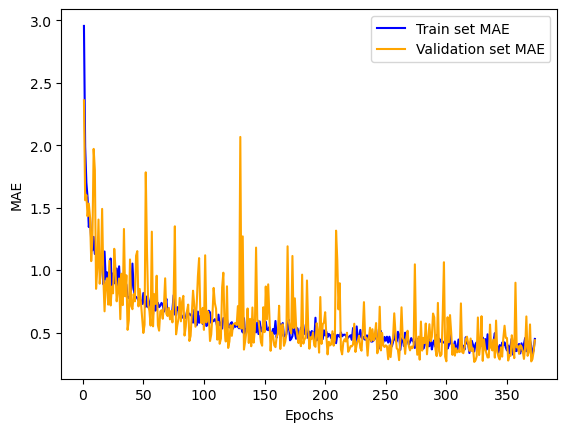

In [23]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Section4_ANN7_3.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
ann.save('Section4_new_ANN_7')
import pickle
pickle.dump(sc, open('Section4_new_scaler_ANN_7.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section4_new_ANN_7\assets


## Part 5 - Make predictions

286/286 [==============================] - 1s 2ms/step


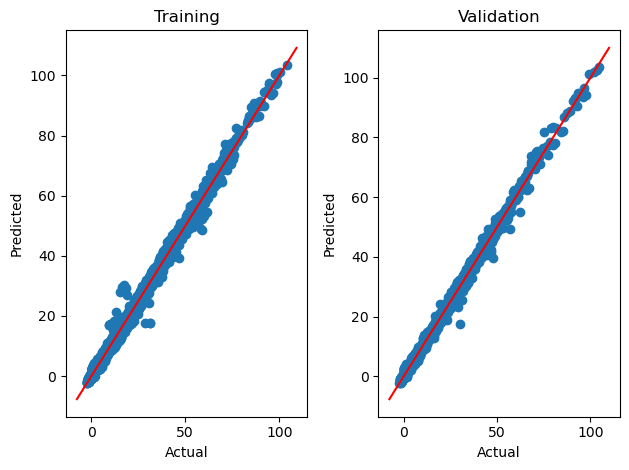

In [25]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Section4_ANN7_1.png', dpi=300, bbox_inches='tight')
# show the plot
plt.show()

In [16]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

286/286 [==============================] - 21s 70ms/step
[[19.   19.32]
 [32.49 33.45]
 [ 0.75  0.95]
 ...
 [ 5.09  5.1 ]
 [23.94 24.99]
 [ 0.12  0.06]]


Text(0, 0.5, 'Predicted data')

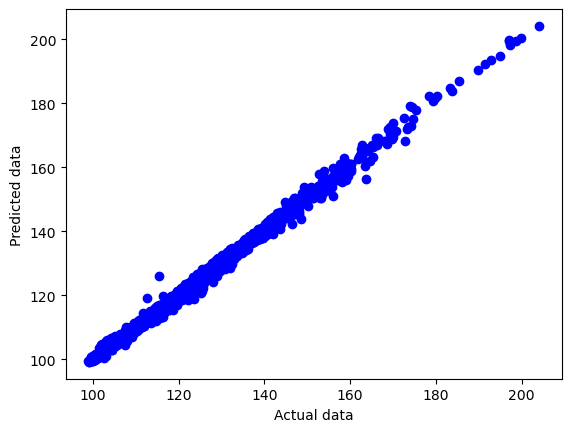

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test+101.25, y_pred+101.25, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

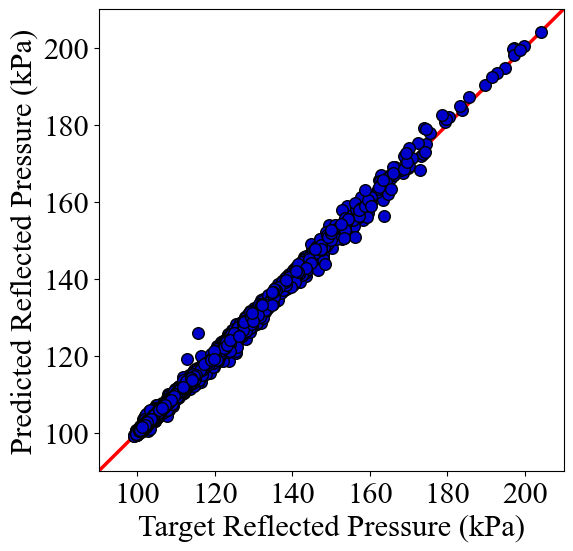

In [19]:
from sklearn.metrics import r2_score
# Initialize layout
#plt.rcdefaults()
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

b_l = 90
u_l = 210

# Add scatterplot
ax1.scatter(y_test+101.25, y_pred+101.25, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Reflected Pressure (kPa)',fontsize = 22)
plt.xlabel('Target Reflected Pressure (kPa)',fontsize = 22)
plt.xticks([100,120,140,160,180,200],fontsize = 22)
plt.yticks([100,120,140,160,180,200],fontsize = 22)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
#plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
#plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 20)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')

# Save the plot
plt.savefig('Section4_ANN7_new.png', dpi=300, bbox_inches='tight')

In [29]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

856/856 [==============================] - 2s 2ms/step
0.24241872095449202
0.2583585413819522


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test+101.25, y_pred+101.25)
print (r2)

0.9974369310739741


In [31]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9973298259216107


In [32]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 50.11%
Within 10% margin 64.11%
Within 20% margin 72.95%
Out of 20% margin 27.05%


In [33]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.997435244709531


In [21]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test+101.25, y_pred+101.25))

0.5436121347135855

In [22]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test+101.25, y_pred+101.25)

0.25835853018975746

In [11]:
ann = load_model('Section4_new_ANN_7')
sc = pickle.load(open('Section4_new_scaler_ANN_7.pkl', 'rb'))